# Capstone Project 1 - Statistical Analysis

In [126]:
#Pandas for dataframes
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

df_cleaned = pd.read_csv('cleaned_data.csv')
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34404 entries, 0 to 34403
Data columns (total 20 columns):
Unnamed: 0        34404 non-null int64
age               34404 non-null int64
job               34404 non-null object
marital           34404 non-null object
education         34404 non-null object
housing           34404 non-null object
loan              34404 non-null object
contact           34404 non-null object
month             34404 non-null object
day_of_week       34404 non-null object
campaign          34404 non-null int64
pdays             34404 non-null float64
previous          34404 non-null int64
poutcome          34404 non-null object
emp.var.rate      34404 non-null float64
cons.price.idx    34404 non-null float64
cons.conf.idx     34404 non-null float64
euribor3m         34404 non-null float64
nr.employed       34404 non-null float64
y                 34404 non-null object
dtypes: float64(6), int64(4), object(10)
memory usage: 5.2+ MB


Let's look at how the numerical variables correlate:

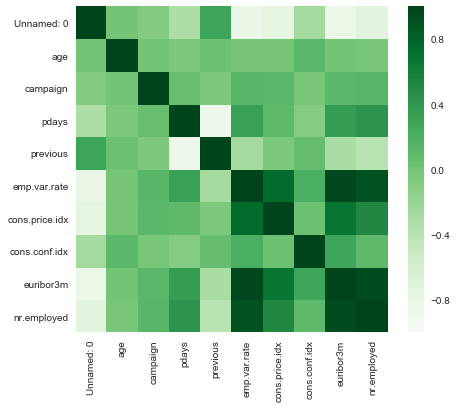

In [127]:
#Calculate correlations between numeric features
correlations = df_cleaned.corr()
#Make the figsize 7 x 6
plt.figure(figsize=(7,6))
#Plot heatmap of correlations
_ = sns.heatmap(correlations, cmap="Greens")
plt.show()

As can be seen, the economic indicators strongly correlate with each other. Additionally, the 'previous' and 'pdays' variables have a strong negative correlation, as expected, since the largest value of 'pdays' (999) corresponds to the smallest value of 'previous' (0).

If the strong correlation between the above variables is statistically significant, we may group or drop some of them, as having multiple strongly correlated variables in our prediction model will not substantially increase the accuracy of our model.

Let's test the statistical significance of the strongly correlated variables representing the state of economy, i.e. of the below pairs using permutation:

- 'emp.var.rate' - 'cons.price.idx'
- 'emp.var.rate' - 'euribor3m'
- 'emp.var.rate' - 'nr.employed'
- 'cons.price.idx' - 'euribor3m'
- 'cons.price.idx' - 'nr.employed'
- 'euribor3m' - 'nr.employed'

## Permutation tests for numerical variables

In [128]:
#Defining the permutation function
def perm_sample(data):

    #Doing the permutation
    perm_data = np.random.permutation(data)

    return perm_data

#Defining a function to generate permuted correlation coefficients
def calculate_perm_corr(data1, data2, size=1):

    #Empty array
    perm_replicates = np.empty(size)

    for i in range(size):
        #Generating permutation samples
        perm_data1 = perm_sample(data1)
        perm_data2 =  perm_sample(data2)

        #Calculating the desired function
        perm_replicates[i] = np.corrcoef(perm_data1, perm_data2)[0,1]

    return perm_replicates

#Saving 'emp.var.rate' and 'cons.price.idx' as separate variables
emp_var = df_cleaned['emp.var.rate']
cons_price = df_cleaned['cons.price.idx'] 

#Calculating the correlation coefficient
r_emp_var_cons_price = np.corrcoef(emp_var, cons_price)[0,1]
r_emp_var_cons_price

0.76525912324329981

In [129]:
#Calculating the permuted coefficients for 'emp.var.rate' and 'cons.price.idx'
permuted_corr_coef = calculate_perm_corr(emp_var, cons_price, size=10000)

#Calculating the p-value for 'emp.var.rate' and 'cons.price.idx'
p = np.sum(permuted_corr_coef >= r_emp_var_cons_price) / len(permuted_corr_coef)
p

0.0

In [130]:
#Saving 'euribor3m' as a separate variable
euribor = df_cleaned['euribor3m'] 

#Calculating the correlation coefficient for 'emp.var.rate' and 'euribor3m'
r_emp_var_euribor = np.corrcoef(emp_var, euribor)[0,1]
r_emp_var_euribor

0.97326701970334073

In [131]:
#Calculating the permuted coefficients for 'emp.var.rate' and 'euribor3m'
permuted_corr_coef = calculate_perm_corr(emp_var, euribor, size=10000)

#Calculating the p-value for 'emp.var.rate' and 'euribor3m'
p = np.sum(permuted_corr_coef >= r_emp_var_euribor) / len(permuted_corr_coef)
p

0.0

In [132]:
#Saving 'nr.employed' as a separate variable
nr_empl = df_cleaned['nr.employed'] 

#Calculating the correlation coefficient for 'emp.var.rate' and 'nr.employed'
r_emp_var_nr_empl = np.corrcoef(emp_var, nr_empl)[0,1]
r_emp_var_nr_empl

0.91133820849660041

In [133]:
#Calculating the permuted coefficients for 'emp.var.rate' and 'nr.employed'
permuted_corr_coef = calculate_perm_corr(emp_var, nr_empl, size=10000)

#Calculating the p-value for 'emp.var.rate' and 'nr.employed'
p = np.sum(permuted_corr_coef >= r_emp_var_nr_empl) / len(permuted_corr_coef)
p

0.0

In [134]:
#Calculating the correlation coefficient for 'cons.price.idx' and 'euribor3m'
r_cons_price_euribor = np.corrcoef(cons_price, euribor)[0,1]
r_cons_price_euribor

0.68506099624043693

In [135]:
#Calculating the permuted coefficients for 'cons.price.idx' and 'euribor3m'
permuted_corr_coef = calculate_perm_corr(cons_price, euribor, size=10000)

#Calculating the p-value for 'cons.price.idx' and 'euribor3m'
p = np.sum(permuted_corr_coef >= r_cons_price_euribor) / len(permuted_corr_coef)
p

0.0

In [136]:
#Calculating the correlation coefficient for 'cons.price.idx' and 'nr.employed'
r_cons_price_nr_empl = np.corrcoef(cons_price, nr_empl)[0,1]
r_cons_price_nr_empl

0.52778244815648823

In [137]:
#Calculating the permuted coefficients for 'cons.price.idx' and 'nr.employed'
permuted_corr_coef = calculate_perm_corr(cons_price, nr_empl, size=10000)

#Calculating the p-value for 'cons.price.idx' and 'nr.employed'
p = np.sum(permuted_corr_coef >= r_cons_price_nr_empl) / len(permuted_corr_coef)
p

0.0

In [138]:
#Calculating the correlation coefficient for 'euribor3m' and 'nr.employed'
r_euribor_nr_empl = np.corrcoef(euribor, nr_empl)[0,1]
r_euribor_nr_empl

0.94543694957355884

In [139]:
#Calculating the permuted coefficients for 'euribor3m' and 'nr.employed'
permuted_corr_coef = calculate_perm_corr(euribor, nr_empl, size=10000)

#Calculating the p-value for 'euribor3m' and 'nr.employed'
p = np.sum(permuted_corr_coef >= r_euribor_nr_empl) / len(permuted_corr_coef)
p

0.0

As can be seen, all correlations of the above pairs are statistically significant, since the p-values are very close to zero. For two of the pairs, though - namely, 'cons.price.idx' - 'euribor3m' and 'cons.price.idx' - 'nr.employed' - the correlation coefficient isn't high.

We can potentially combine these variables into one weighted variable that would represent the state of the economy.

Let's look at the mean age of the dataset and use bootstrapping to see if this mean is significantly different from the mean of the sampling distributin of means drawn from 10,000 bootstrap replicates:

In [140]:
#Calculating the mean age of our dataset
mean_age = np.mean(df_cleaned['age'])
mean_age

39.85803976281828

In [141]:
#Defining function to draw bootstrap replicates
def draw_bs_reps(data, func, size=1):
    
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data, size=len(data)))

    return bs_replicates

#Setting random seed
np.random.seed(42)

#Generating 10000 bootstrap replicates with the shifted data
bs_replicates = draw_bs_reps(df_cleaned['age'], np.mean, size=10000)

#Calculating the p-value for the dataset mean 
p = np.sum(bs_replicates >= mean_age) / len(bs_replicates)
p

0.49869999999999998

As we can see, the mean of our dataset is very close to the mean of the sampling distribution of the bootstrapped samples' means, so our dataset represents the overall population well, and there's no skew towards any particular age.

## Chi-square test for independence

Now, let's check if our categorical variables are independent of each other using a chi-square test with a 95% level of confidence. We will need to check the following pairs (it doesn't make much sense to do a chi-square test for days of the week or months, and the dependence/independence of the outcome of the previous campaign should be checked by a more comprehensive method, like logistic regression).

- 'job' - 'marital'
- 'job' - 'education'
- 'job' - 'housing'
- 'job' - 'loan'
- 'job' - 'contact'
- 'marital' - 'education'
- 'marital' - 'housing'
- 'marital' - 'loan'
- 'marital' - 'contact'
- 'education' - 'housing'
- 'education' - 'loan'
- 'education' - 'contact'
- 'housing' - 'loan'
- 'housing' - 'contact'
- 'loan' - 'contact'  

To use chi-square test, our dataset must meet the following criteria:

- Sampled observations must be independent
- Random sampling/assignment should be used
- If sampling without replacement, the data should be <10% of population
- Each category should contribute to only one cell in the contingency table
- Each particular scenario (i.e. cell) should have at least 5 expected cases

In the dataset description, there's no information on how the data were collected, so we can only assume that the observations are independent and that the random sampling was used. We will also assume that each category contributes to only one cell in the contingency table. Our dataset is definitely less than 10% of population. Last, we will see if there are scenarios with less than 5 cases.

Our null-hypothesis for each pair will be that the variables are independent from each other. The high chi-squared value or low p-value will allow us to reject this null-hypothesis and conclude that the variables are dependent.

In [142]:
#Creating the contingency table for comparing 'job' and 'education'
contingency_table = pd.crosstab(index=df_cleaned['job'], columns=df_cleaned['education'], margins=True)
contingency_table

education,basic_school,high.school,professional.course,university.degree,All
job,,,,,
administration_management,956,3142,384,6890,11372
blue-collar,6961,1530,3365,1683,13539
no_active_income,984,470,336,469,2259
self-employed,669,300,258,1201,2428
services,1235,2463,250,274,4222
student,116,289,33,146,584
All,10921,8194,4626,10663,34404


In [143]:
#Calculating chi-squared and p-value
chi2, p, dof, ex =stats.chi2_contingency(contingency_table)
chi2, p, dof

(15401.719799238672, 0.0, 24)

In [144]:
#Creating the contingency table for comparing 'job' and 'marital'
contingency_table = pd.crosstab(index=df_cleaned['job'], columns=df_cleaned['marital'], margins=True)
contingency_table

marital,married,single,All
job,,,
administration_management,6270,5102,11372
blue-collar,8861,4678,13539
no_active_income,1560,699,2259
self-employed,1673,755,2428
services,2609,1613,4222
student,35,549,584
All,21008,13396,34404


In [145]:
#Calculating chi-squared and p-value
chi2, p, dof, ex =stats.chi2_contingency(contingency_table)
chi2, p, dof

(1146.9072875893796, 4.6703967524795622e-238, 12)

In [146]:
#Creating the contingency table for comparing 'job' and 'housing'
contingency_table = pd.crosstab(index=df_cleaned['job'], columns=df_cleaned['housing'], margins=True)
contingency_table

housing,no,yes,All
job,,,
administration_management,5297,6075,11372
blue-collar,6306,7233,13539
no_active_income,1011,1248,2259
self-employed,1119,1309,2428
services,2014,2208,4222
student,272,312,584
All,16019,18385,34404


In [147]:
#Calculating chi-squared and p-value
chi2, p, dof, ex =stats.chi2_contingency(contingency_table)
chi2, p, dof

(5.3963517634649607, 0.94341480681562429, 12)

In [148]:
#Creating the contingency table for comparing 'job' and 'loan'
contingency_table = pd.crosstab(index=df_cleaned['job'], columns=df_cleaned['loan'], margins=True)
contingency_table

loan,no,yes,All
job,,,
administration_management,9480,1892,11372
blue-collar,11489,2050,13539
no_active_income,1932,327,2259
self-employed,2085,343,2428
services,3571,651,4222
student,485,99,584
All,29042,5362,34404


In [149]:
#Calculating chi-squared and p-value
chi2, p, dof, ex =stats.chi2_contingency(contingency_table)
chi2, p, dof

(18.552700603242883, 0.099910136295762841, 12)

In [150]:
#Creating the contingency table for comparing 'job' and 'contact'
contingency_table = pd.crosstab(index=df_cleaned['job'], columns=df_cleaned['contact'], margins=True)
contingency_table

contact,cellular,telephone,All
job,,,
administration_management,7417,3955,11372
blue-collar,7857,5682,13539
no_active_income,1460,799,2259
self-employed,1386,1042,2428
services,2337,1885,4222
student,421,163,584
All,20878,13526,34404


In [151]:
#Calculating chi-squared and p-value
chi2, p, dof, ex =stats.chi2_contingency(contingency_table)
chi2, p, dof

(248.10847073292709, 3.392524875498881e-46, 12)

In [152]:
#Creating the contingency table for comparing'marital' and 'education'
contingency_table = pd.crosstab(index=df_cleaned['marital'], columns=df_cleaned['education'], margins=True)
contingency_table

education,basic_school,high.school,professional.course,university.degree,All
marital,,,,,
married,8043,4504,2823,5638,21008
single,2878,3690,1803,5025,13396
All,10921,8194,4626,10663,34404


Since the table contains zero values, they should be dropped before the chi-square test is performed.

In [153]:
#Filtering out zero values
contingency_table = contingency_table.loc[['married', 'single', 'All'], :]

#Calculating chi-squared and p-value
chi2, p, dof, ex =stats.chi2_contingency(contingency_table)
chi2, p, dof

(1156.1699598205375, 2.8246373319745929e-244, 8)

In [154]:
#Creating the contingency table for comparing'marital' and 'housing'
contingency_table = pd.crosstab(index=df_cleaned['marital'], columns=df_cleaned['housing'], margins=True)
contingency_table

housing,no,yes,All
marital,,,
married,9860,11148,21008
single,6159,7237,13396
All,16019,18385,34404


In [155]:
#Filtering out zero values
contingency_table = contingency_table.loc[['married', 'single', 'All'], :]

#Calculating chi-squared and p-value
chi2, p, dof, ex =stats.chi2_contingency(contingency_table)
chi2, p, dof

(3.0177455175832089, 0.55486013466582684, 4)

In [156]:
#Creating the contingency table for comparing'marital' and 'loan'
contingency_table = pd.crosstab(index=df_cleaned['marital'], columns=df_cleaned['loan'], margins=True)
contingency_table

loan,no,yes,All
marital,,,
married,17751,3257,21008
single,11291,2105,13396
All,29042,5362,34404


In [157]:
#Filtering out zero values
contingency_table = contingency_table.loc[['married', 'single', 'All'], :]

#Calculating chi-squared and p-value
chi2, p, dof, ex =stats.chi2_contingency(contingency_table)
chi2, p, dof

(0.27426516840179938, 0.99141430200064906, 4)

In [158]:
#Creating the contingency table for comparing'marital' and 'contact'
contingency_table = pd.crosstab(index=df_cleaned['marital'], columns=df_cleaned['contact'], margins=True)
contingency_table

contact,cellular,telephone,All
marital,,,
married,12208,8800,21008
single,8670,4726,13396
All,20878,13526,34404


In [159]:
#Filtering out zero values
contingency_table = contingency_table.loc[['married', 'single', 'All'], :]

#Calculating chi-squared and p-value
chi2, p, dof, ex =stats.chi2_contingency(contingency_table)
chi2, p, dof

(149.78317319473658, 2.2656396272034556e-31, 4)

In [160]:
#Creating the contingency table for comparing 'education' and 'housing'
contingency_table = pd.crosstab(index=df_cleaned['education'], columns=df_cleaned['housing'], margins=True)
contingency_table

housing,no,yes,All
education,,,
basic_school,5186,5735,10921
high.school,3896,4298,8194
professional.course,2074,2552,4626
university.degree,4863,5800,10663
All,16019,18385,34404


In [161]:
#Calculating chi-squared and p-value
chi2, p, dof, ex =stats.chi2_contingency(contingency_table)
chi2, p, dof

(16.414971729283764, 0.036811374730507836, 8)

In [162]:
#Creating the contingency table for comparing 'education' and 'loan'
contingency_table = pd.crosstab(index=df_cleaned['education'], columns=df_cleaned['loan'], margins=True)
contingency_table

loan,no,yes,All
education,,,
basic_school,9284,1637,10921
high.school,6915,1279,8194
professional.course,3907,719,4626
university.degree,8936,1727,10663
All,29042,5362,34404


In [163]:
#Calculating chi-squared and p-value
chi2, p, dof, ex =stats.chi2_contingency(contingency_table)
chi2, p, dof

(5.9814909326695673, 0.6493052813528668, 8)

In [164]:
#Creating the contingency table for comparing 'education' and 'contact'
contingency_table = pd.crosstab(index=df_cleaned['education'], columns=df_cleaned['contact'], margins=True)
contingency_table

contact,cellular,telephone,All
education,,,
basic_school,5782,5139,10921
high.school,4800,3394,8194
professional.course,2952,1674,4626
university.degree,7344,3319,10663
All,20878,13526,34404


In [165]:
#Calculating chi-squared and p-value
chi2, p, dof, ex =stats.chi2_contingency(contingency_table)
chi2, p, dof

(608.18924896371664, 4.0602152260228977e-126, 8)

In [166]:
#Creating the contingency table for comparing 'housing' and 'loan'
contingency_table = pd.crosstab(index=df_cleaned['housing'], columns=df_cleaned['loan'], margins=True)
contingency_table

loan,no,yes,All
housing,,,
no,13814,2205,16019
yes,15228,3157,18385
All,29042,5362,34404


In [167]:
#Filtering out zero values
contingency_table = contingency_table.loc[['no', 'yes', 'All'], :]

#Calculating chi-squared and p-value
chi2, p, dof, ex =stats.chi2_contingency(contingency_table)
chi2, p, dof

(75.513259773675955, 1.5518508930673284e-15, 4)

In [216]:
#Creating the contingency table for comparing 'housing' and 'contact'
contingency_table = pd.crosstab(index=df_cleaned['housing'], columns=df_cleaned['contact'], margins=True)
contingency_table

contact,cellular,telephone,All
housing,,,
no,8997,7022,16019
yes,11881,6504,18385
All,20878,13526,34404


In [169]:
#Filtering out zero values
contingency_table = contingency_table.loc[['no', 'yes', 'All'], :]

#Calculating chi-squared and p-value
chi2, p, dof, ex =stats.chi2_contingency(contingency_table)
chi2, p, dof

(256.72320246552039, 2.3177696887187032e-54, 4)

In [170]:
#Creating the contingency table for comparing 'loan' and 'contact'
contingency_table = pd.crosstab(index=df_cleaned['loan'], columns=df_cleaned['contact'], margins=True)
contingency_table

contact,cellular,telephone,All
loan,,,
no,17552,11490,29042
yes,3326,2036,5362
All,20878,13526,34404


In [171]:
#Filtering out zero values
contingency_table = contingency_table.loc[['no', 'yes', 'All'], :]

#Calculating chi-squared and p-value
chi2, p, dof, ex =stats.chi2_contingency(contingency_table)
chi2, p, dof

(4.8112116347748017, 0.30722251982474919, 4)

Based on the results of the chi-squared tests, we conclude that:

- Job level depends on the level of education
- Job level is independend from the absence or presence of a housing loan
- Job level depends on the marital status
- Job level is independend from the absence or presence of a personal loan
- Job level depends on the type of contact
- Marital status depends on the level of education
- Marital status is independend from the absence or presence of a housing loan
- Marital status is independend from the absence or presence of a personal loan
- Marital status depends on the type of contact
- Level of education is independend from the absence or presence of a housing loan
- Level of education is independend from the absence or presence of a personal loan
- Level of education depends on the type of contact
- Absence or presence of a housing loan depends on the absence or presence of a personal loan
- Absence or presence of a housing loan depends on the type of contact
- Absence or presence of a personal loan is independent from the type of contact

## Two-sample z-test

Let's also perform a two-sample z-test to evaluate if the groups within our categorical variables differ significantly in whether they subscribe for the deposit or not. To do that, we will need to group different levels of each categorical variable into two groups and calculate the z-score and the p-value. The null hypothesis for the test will be that there's no difference between those two groups with respect to the subscription to the deposit. 

The formula for the two-sample $z$-test:

$$z = \frac{\left( \hat{p}_1 - \hat{p}_2 \right) - 0}{\sqrt{\hat{p} (1 - \hat{p)} \left( \frac{1}{n_1} + \frac{1}{n_2}\right)}}$$

where the overall sample proportion is defined as

$$\hat{p} = \frac{y_1 + y_2}{n_1 + n_2}$$

The null and alternate hypotheses:

$$H_0: p_1 = p_2$$
$$H_A: p_1 \ne p_2$$

We'll use the 95% confidence level.

We will need to test this hypothesis for the below categorical variables vs. variable 'y' (has the customer subscribed for a deposit). 

- 'job'               
- 'marital'          
- 'education'        
- 'housing'           
- 'loan'              
- 'contact'           
- 'month'             
- 'day_of_week'       
- 'poutcome' 

Let's first re-group the categories of each variable into two:

In [172]:
#Defining the levels of the 'job' variable
df_cleaned.job.unique()

array(['services', 'administration_management', 'blue-collar',
       'no_active_income', 'self-employed', 'student'], dtype=object)

In [173]:
#Re-grouping the job categories into two new categories
df_grouped = df_cleaned.copy()
df_grouped.job.replace(['services', 'blue-collar',
       'no_active_income', 'self-employed', 'student'], 'lower salary', inplace=True)
df_grouped.job.replace(['administration_management'], 'higher salary', inplace=True)

In [174]:
#Defining the levels of the 'marital' variable
df_grouped.marital.unique()

array(['married', 'single'], dtype=object)

In [175]:
#Defining the levels of the 'education' variable
df_grouped.education.unique()

array(['basic_school', 'high.school', 'professional.course',
       'university.degree'], dtype=object)

In [176]:
#Re-grouping the education categories into two new categories
df_grouped.education.replace('university.degree', 'university', inplace=True)
df_grouped.education.replace(['basic_school', 'high.school', 'professional.course'], 'basic education', inplace=True)

In [177]:
#Defining the levels of the 'housing' variable
df_grouped.housing.unique()

array(['no', 'yes'], dtype=object)

In [178]:
#Defining the levels of the 'loan' variable
df_grouped.loan.unique()

array(['no', 'yes'], dtype=object)

In [179]:
#Defining the levels of the 'contact' variable
df_grouped.contact.unique()

array(['telephone', 'cellular'], dtype=object)

In [180]:
#Defining the levels of the 'month' variable
df_grouped.month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr', 'sep'], dtype=object)

In [181]:
#Re-grouping the month categories into two new categories
df_grouped.month.replace(['oct', 'nov', 'dec', 'sep'], 'autumn_winter', inplace=True)
df_grouped.month.replace(['may', 'jun', 'jul', 'aug', 'mar', 'apr'], 'spring_summer', inplace=True)

In [182]:
#Defining the levels of the 'day_of_week' variable
df_grouped.day_of_week.unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [183]:
#Re-grouping the day of week categories into two new categories
df_grouped.day_of_week.replace(['mon', 'tue', 'wed'], 'first_half', inplace=True)
df_grouped.day_of_week.replace(['thu', 'fri'], 'second_half', inplace=True)

In [188]:
#Converting variable 'y' into ones and zeroes
df_grouped.y.replace('no', 0, inplace=True)
df_grouped.y.replace('yes', 1, inplace=True)

Next, let's do the two sample tests:

In [192]:
#Splitting the 'job' variable into two datasets
a = df_grouped[df_grouped.job=='higher salary']
b = df_grouped[df_grouped.job=='lower salary']

n_a = len(a)
n_b = len(b)

#Calculating the proportions of two levels of the variable for the response variable 'y'
prop_a = np.sum(a.y) / len(a)
prop_b = np.sum(b.y) / len(b)

#Calculating difference in proportions
prop_diff = prop_a - prop_b

#Calculating overall sample proportion
p_hat = (np.sum(a.y) + np.sum(b.y)) / (len(a) + len(b))

z = prop_diff / np.sqrt(p_hat * (1 - p_hat) * ((1 / n_a) + (1 / n_b)))

#Calculating a 'two-tail' p-value
p = stats.norm.cdf(-z) * 2

print("Difference in proportions between 'higher salary' and 'lower salary' groups: {}".format(prop_diff))
print("Z score: {}".format(z))
print("P-value: {}".format(p))

Difference in proportions between 'higher salary' and 'lower salary' groups: 0.022183774166319184
Z score: 6.1879474663853635
P-value: 6.095263287957264e-10


The p-value is very small, so we reject the null-hypothesis that there's no difference between the level of salary with respect to the subscription to the deposit as a result of the marketing campaign. For the 95% level of confidence, the z-score should be 1.96 or higher or -1.96 or lower. Our z-score is substantially higher than 1.96, so we once again reject the null-hypothesis.

In [203]:
#Splitting the 'marital' variable into two datasets
a = df_grouped[df_grouped.marital=='married']
b = df_grouped[df_grouped.marital=='single']

n_a = len(a)
n_b = len(b)

#Calculating the proportions of two levels of the variable for the response variable 'y'
prop_a = np.sum(a.y) / len(a)
prop_b = np.sum(b.y) / len(b)

#Calculating difference in proportions
prop_diff = prop_a - prop_b

#Calculating overall sample proportion
p_hat = (np.sum(a.y) + np.sum(b.y)) / (len(a) + len(b))

z = prop_diff / np.sqrt(p_hat * (1 - p_hat) * ((1 / n_a) + (1 / n_b)))

#Calculating a 'two-tail' p-value
p = stats.norm.cdf(z) * 2

print("Difference in proportions between 'married' and 'single' groups: {}".format(prop_diff))
print("Z score: {}".format(z))
print("P-value: {}".format(p))

Difference in proportions between 'married' and 'single' groups: -0.028898701047953515
Z score: -8.355744991443245
P-value: 6.502103737414796e-17


The p-value is very small, so we reject the null-hypothesis that there's no difference between the marital status with respect to the subscription to the deposit as a result of the marketing campaign. For the 95% level of confidence, the z-score should be 1.96 or higher or -1.96 or lower. Our z-score is substantially higher than 1.96, so we once again reject the null-hypothesis.

In [205]:
#Splitting the 'education' variable into two datasets
a = df_grouped[df_grouped.education=='university']
b = df_grouped[df_grouped.education=='basic education']

n_a = len(a)
n_b = len(b)

#Calculating the proportions of two levels of the variable for the response variable 'y'
prop_a = np.sum(a.y) / len(a)
prop_b = np.sum(b.y) / len(b)

#Calculating difference in proportions
prop_diff = prop_a - prop_b

#Calculating overall sample proportion
p_hat = (np.sum(a.y) + np.sum(b.y)) / (len(a) + len(b))

z = prop_diff / np.sqrt(p_hat * (1 - p_hat) * ((1 / n_a) + (1 / n_b)))

#Calculating a 'two-tail' p-value
p = stats.norm.cdf(-z) * 2

print("Difference in proportions between 'university' and 'basic education' groups: {}".format(prop_diff))
print("Z score: {}".format(z))
print("P-value: {}".format(p))

Difference in proportions between 'university' and 'basic education' groups: 0.037078030839096485
Z score: 10.167935932827127
P-value: 2.7568869150718265e-24


The p-value is very small, so we reject the null-hypothesis that there's no difference between the level of education with respect to the subscription to the deposit as a result of the marketing campaign. For the 95% level of confidence, the z-score should be 1.96 or higher or -1.96 or lower. Our z-score is substantially higher than 1.96, so we once again reject the null-hypothesis.

In [207]:
#Splitting the 'housing' variable into two datasets
a = df_grouped[df_grouped.housing=='yes']
b = df_grouped[df_grouped.housing=='no']

n_a = len(a)
n_b = len(b)

#Calculating the proportions of two levels of the variable for the response variable 'y'
prop_a = np.sum(a.y) / len(a)
prop_b = np.sum(b.y) / len(b)

#Calculating difference in proportions
prop_diff = prop_a - prop_b

#Calculating overall sample proportion
p_hat = (np.sum(a.y) + np.sum(b.y)) / (len(a) + len(b))

z = prop_diff / np.sqrt(p_hat * (1 - p_hat) * ((1 / n_a) + (1 / n_b)))

#Calculating a 'two-tail' p-value
p = stats.norm.cdf(-z) * 2

print("Difference in proportions between 'yes' and 'no' groups: {}".format(prop_diff))
print("Z score: {}".format(z))
print("P-value: {}".format(p))

Difference in proportions between 'yes' and 'no' groups: 0.0073541510902634805
Z score: 2.1752490973836656
P-value: 0.029611454762112032


The p-value is small (though not as for the previous variables), so we reject the null-hypothesis that there's no difference between the presence or absence of the housing loan with respect to the subscription to the deposit as a result of the marketing campaign. For the 95% level of confidence, the z-score should be 1.96 or higher or -1.96 or lower. Our z-score is higher than 1.96, so we once again reject the null-hypothesis.

In [209]:
#Splitting the 'loan' variable into two datasets
a = df_grouped[df_grouped.loan=='yes']
b = df_grouped[df_grouped.loan=='no']

n_a = len(a)
n_b = len(b)

#Calculating the proportions of two levels of the variable for the response variable 'y'
prop_a = np.sum(a.y) / len(a)
prop_b = np.sum(b.y) / len(b)

#Calculating difference in proportions
prop_diff = prop_a - prop_b

#Calculating overall sample proportion
p_hat = (np.sum(a.y) + np.sum(b.y)) / (len(a) + len(b))

z = prop_diff / np.sqrt(p_hat * (1 - p_hat) * ((1 / n_a) + (1 / n_b)))

#Calculating a 'two-tail' p-value
p = stats.norm.cdf(z) * 2

print("Difference in proportions between 'yes' and 'no' groups: {}".format(prop_diff))
print("Z score: {}".format(z))
print("P-value: {}".format(p))

Difference in proportions between 'yes' and 'no' groups: -0.002527381853766636
Z score: -0.543593755960452
P-value: 0.5867210575181085


The p-value is very high, so we fail to reject the null-hypothesis that there's no difference between the absence or presence of a personal loan with respect to the subscription to the deposit as a result of the marketing campaign. There's no evidence of statistically significant difference for the people with and without personal loan.

For the 95% level of confidence, the z-score should be 1.96 or higher or -1.96 or lower. Our z-score is lower than 1.96, so we once again fail to reject the null-hypothesis.

In [210]:
#Splitting the 'contact' variable into two datasets
a = df_grouped[df_grouped.contact=='telephone']
b = df_grouped[df_grouped.contact=='cellular']

n_a = len(a)
n_b = len(b)

#Calculating the proportions of two levels of the variable for the response variable 'y'
prop_a = np.sum(a.y) / len(a)
prop_b = np.sum(b.y) / len(b)

#Calculating difference in proportions
prop_diff = prop_a - prop_b

#Calculating overall sample proportion
p_hat = (np.sum(a.y) + np.sum(b.y)) / (len(a) + len(b))

z = prop_diff / np.sqrt(p_hat * (1 - p_hat) * ((1 / n_a) + (1 / n_b)))

#Calculating a 'two-tail' p-value
p = stats.norm.cdf(z) * 2

print("Difference in proportions between 'telephone' and 'cellular' groups: {}".format(prop_diff))
print("Z score: {}".format(z))
print("P-value: {}".format(p))

Difference in proportions between 'telephone' and 'cellular' groups: -0.0963546387802868
Z score: -27.90799888610296
P-value: 2.1337168339064525e-171


The p-value is extremely small, so we reject the null-hypothesis that there's no difference between the way of contacting the respondent with respect to the subscription to the deposit as a result of the marketing campaign. For the 95% level of confidence, the z-score should be 1.96 or higher or -1.96 or lower. Our z-score is significantly higher than 1.96, so we once again reject the null-hypothesis.

In [213]:
#Splitting the 'month' variable into two datasets
a = df_grouped[df_grouped.month=='autumn_winter']
b = df_grouped[df_grouped.month=='spring_summer']

n_a = len(a)
n_b = len(b)

#Calculating the proportions of two levels of the variable for the response variable 'y'
prop_a = np.sum(a.y) / len(a)
prop_b = np.sum(b.y) / len(b)

#Calculating difference in proportions
prop_diff = prop_a - prop_b

#Calculating overall sample proportion
p_hat = (np.sum(a.y) + np.sum(b.y)) / (len(a) + len(b))

z = prop_diff / np.sqrt(p_hat * (1 - p_hat) * ((1 / n_a) + (1 / n_b)))

#Calculating a 'two-tail' p-value
p = stats.norm.cdf(-z) * 2

print("Difference in proportions between'autumn_winter' and 'spring_summer' groups: {}".format(prop_diff))
print("Z score: {}".format(z))
print("P-value: {}".format(p))

Difference in proportions between'autumn_winter' and 'spring_summer' groups: 0.10589917847856661
Z score: 20.51134214462948
P-value: 1.7052352137787725e-93


The p-value is extremely small, so we reject the null-hypothesis that there's no difference between the season of the year with respect to the subscription to the deposit as a result of the marketing campaign. For the 95% level of confidence, the z-score should be 1.96 or higher or -1.96 or lower. Our z-score is significantly higher than 1.96, so we once again reject the null-hypothesis.

In [215]:
#Splitting the 'day_of_week' variable into two datasets
a = df_grouped[df_grouped.day_of_week=='first_half']
b = df_grouped[df_grouped.day_of_week=='second_half']

n_a = len(a)
n_b = len(b)

#Calculating the proportions of two levels of the variable for the response variable 'y'
prop_a = np.sum(a.y) / len(a)
prop_b = np.sum(b.y) / len(b)

#Calculating difference in proportions
prop_diff = prop_a - prop_b

#Calculating overall sample proportion
p_hat = (np.sum(a.y) + np.sum(b.y)) / (len(a) + len(b))

z = prop_diff / np.sqrt(p_hat * (1 - p_hat) * ((1 / n_a) + (1 / n_b)))

#Calculating a 'two-tail' p-value
p = stats.norm.cdf(z) * 2

print("Difference in proportions between 'first_half' and 'second_half' groups: {}".format(prop_diff))
print("Z score: {}".format(z))
print("P-value: {}".format(p))

Difference in proportions between 'first_half' and 'second_half' groups: -0.005319369704561025
Z score: -1.5430784108976967
P-value: 0.12281175219974018


The p-value is high, so we fail to reject the null-hypothesis that there's no difference between the two parts of the week with respect to the subscription to the deposit as a result of the marketing campaign. There's no evidence of statistically significant difference for the rates of deposit subscription for the first or the second half of the week.

For the 95% level of confidence, the z-score should be 1.96 or higher or -1.96 or lower. Our z-score is lower than 1.96, so we once again fail to reject the null-hypothesis.